In [10]:
import numpy as np
from numpy import ma
import math
import scipy
import scipy.constants as constants
import os
from IPython.display import Image

from netCDF4 import Dataset
      
from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

# from matplotlib.mlab import bivariate_normal

NA = 6.022e+23

In [11]:
# 0.5x0.625
FILEDIR1 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/gc_05x0625_aerosol_compare'
NcFile1   = Dataset(FILEDIR1+'/OutputDir/GEOSChem.SpeciesConc_inst.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')

lat1             = NcFile1.variables['lat'][:]
lon1             = NcFile1.variables['lon'][:]
EU1              = NcFile1.variables['SpeciesConc_PASV_EU']
LA1              = NcFile1.variables['SpeciesConc_PASV_LA']

GC_AREA1 = NcFile1.variables['AREA'][:,:]


# 1*1.25
FILEDIR2 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/gc_1x125_aerosol_compare'
NcFile2   = Dataset(FILEDIR2+'/OutputDir/GEOSChem.SpeciesConc_inst.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')

lat2             = NcFile2.variables['lat'][:]
lon2             = NcFile2.variables['lon'][:]
EU2              = NcFile2.variables['SpeciesConc_PASV_EU']
LA2              = NcFile2.variables['SpeciesConc_PASV_LA']

GC_AREA2 = NcFile2.variables['AREA'][:,:];


# 2*2.5
FILEDIR3 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/gc_2x25_aerosol_compare'
NcFile3   = Dataset(FILEDIR3+'/OutputDir/GEOSChem.SpeciesConc_inst.20150101_0010z.nc4','r',format='NETCDF4_CLASSIC')

lat3             = NcFile3.variables['lat'][:]
lon3             = NcFile3.variables['lon'][:]
EU3              = NcFile3.variables['SpeciesConc_PASV_EU']
LA3              = NcFile3.variables['SpeciesConc_PASV_LA']

GC_AREA3 = NcFile3.variables['AREA'][:,:];


# 4*5
FILEDIR4 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/gc_4x5_aerosol_compare'
NcFile4   = Dataset(FILEDIR4+'/OutputDir/GEOSChem.SpeciesConc_inst.20150101_0010z.nc4','r',format='NETCDF4_CLASSIC')

lat4             = NcFile4.variables['lat'][:]
lon4             = NcFile4.variables['lon'][:]
EU4              = NcFile4.variables['SpeciesConc_PASV_EU']
LA4              = NcFile4.variables['SpeciesConc_PASV_LA']

GC_AREA4 = NcFile4.variables['AREA'][:,:];


# lagrange: 2*2.5
FILEDIR0 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/gc_2x25_aerosol_compare_lagrange'
NcFile0   = Dataset(FILEDIR0+'/OutputDir/GEOSChem.SpeciesConc_inst.20150101_0010z.nc4','r',format='NETCDF4_CLASSIC')

lat0             = NcFile0.variables['lat'][:]
lon0             = NcFile0.variables['lon'][:]
EU0              = NcFile0.variables['SpeciesConc_PASV_EU']
LA0              = NcFile0.variables['SpeciesConc_PASV_LA']

GC_AREA0 = NcFile0.variables['AREA'][:,:];

EU1

<class 'netCDF4._netCDF4.Variable'>
float32 SpeciesConc_PASV_EU(time, lev, lat, lon)
    long_name: Dry mixing ratio of species PASV_EU
    units: mol mol-1 dry
    averaging_method: instantaneous
unlimited dimensions: time
current shape = (31, 72, 361, 576)
filling off

In [12]:
del NcFile0, NcFile1, NcFile2, NcFile3, NcFile4

In [13]:
#------------------------------------------------
# total air mass in each grid  ------------------
#------------------------------------------------

# 0.5x0.625
AD_file1 = open(FILEDIR1+'/State_Met_AD.txt','r')

GC_AD1 = EU1[0,:,:,:]*0.0

Nx1 = len(EU1[0,0,0,:])
Ny1 = len(EU1[0,0,:,0])
Nz1 = len(EU1[0,:,0,0])
Nt1 = len(EU1[:,0,0,0])

for ix in range(Nx1):
    for iy in range(Ny1):
        for iz in range(Nz1):
            line = AD_file1.readline()
            GC_AD1[iz,iy,ix] = float(line)
            

# 1.0x1.25
AD_file2 = open(FILEDIR2+'/State_Met_AD.txt','r')

GC_AD2 = EU2[0,:,:,:]*0.0

Nx2 = len(EU2[0,0,0,:])
Ny2 = len(EU2[0,0,:,0])
Nz2 = len(EU2[0,:,0,0])
Nt2 = len(EU2[:,0,0,0])

for ix in range(Nx2):
    for iy in range(Ny2):
        for iz in range(Nz2):
            line = AD_file2.readline()
            GC_AD2[iz,iy,ix] = float(line)
            

# 2x2.5         
AD_file3 = open(FILEDIR3+'/State_Met_AD.txt','r')

GC_AD3 = EU3[0,:,:,:]*0.0

Nx3 = len(EU3[0,0,0,:])
Ny3 = len(EU3[0,0,:,0])
Nz3 = len(EU3[0,:,0,0])
Nt3 = len(EU3[:,0,0,0])

for ix in range(Nx3):
    for iy in range(Ny3):
        for iz in range(Nz3):
            line = AD_file3.readline()
            GC_AD3[iz,iy,ix] = float(line)
            

# 4x5          
AD_file4 = open(FILEDIR4+'/State_Met_AD.txt','r')

GC_AD4 = EU4[0,:,:,:]*0.0

Nx4 = len(EU4[0,0,0,:])
Ny4 = len(EU4[0,0,:,0])
Nz4 = len(EU4[0,:,0,0])
Nt4 = len(EU4[:,0,0,0])

for ix in range(Nx4):
    for iy in range(Ny4):
        for iz in range(Nz4):
            line = AD_file4.readline()
            GC_AD4[iz,iy,ix] = float(line)
            
            

# Lagrange: 2x2.5          
AD_file0 = open(FILEDIR0+'/State_Met_AD.txt','r')

GC_AD0 = EU0[0,:,:,:]*0.0

Nx0 = len(LA0[0,0,0,:])
Ny0 = len(LA0[0,0,:,0])
Nz0 = len(LA0[0,:,0,0])
Nt0 = len(LA0[:,0,0,0])

for ix in range(Nx0):
    for iy in range(Ny0):
        for iz in range(Nz0):
            line = AD_file0.readline()
            GC_AD0[iz,iy,ix] = float(line)

In [14]:
del AD_file0, AD_file1, AD_file2, AD_file3, AD_file4


In [4]:
# # 3-D entropy

# k = constants.k
# print(f'Boltzmann constant={k}')

# # change total air mass from kg to mol

# AD1_mol = GC_AD1[:,:,:]*1000.0/28.97
# AD2_mol = GC_AD2[:,:,:]*1000.0/28.97

# # entropy

# Entropy3d_EU1, Entropy3d_LA1, Entropy3d_EU2, Entropy3d_LA2 = [], [], [], []

# for it in range(Nt1):
#     S_EU1 = -k*np.sum( GC_AD1[:,:,:]*EU1[it,:,:,:]* np.log(EU1[it,:,:,:], out=np.zeros_like(EU1[it,:,:,:]), \
#                                                            where=(EU1[it,:,:,:]!=0)), axis=(0,1,2) )
#     S_LA1 = -k*np.sum( GC_AD1[:,:,:]*LA1[it,:,:,:]* np.log(LA1[it,:,:,:], out=np.zeros_like(LA1[it,:,:,:]), \
#                                                            where=(LA1[it,:,:,:]!=0)), axis=(0,1,2) )

#     S_EU2 = -k*np.sum( GC_AD2[:,:,:]*EU2[it,:,:,:]* np.log(EU2[it,:,:,:], out=np.zeros_like(EU2[it,:,:,:]), \
#                                                            where=(EU2[it,:,:,:]!=0)), axis=(0,1,2) )
#     S_LA2 = -k*np.sum( GC_AD2[:,:,:]*LA2[it,:,:,:]* np.log(LA2[it,:,:,:], out=np.zeros_like(LA2[it,:,:,:]), \
#                                                            where=(LA2[it,:,:,:]!=0)), axis=(0,1,2) )
    
#     Entropy3d_EU1.append(S_EU1)
#     Entropy3d_LA1.append(S_LA1)
#     Entropy3d_EU2.append(S_EU2)    
#     Entropy3d_LA2.append(S_LA2)
    
# # print(Entropy3d_EU1, Entropy3d_LA1)
# # print(Entropy3d_EU2, Entropy3d_LA2)



In [5]:
# # Plot CFD curve: mass vs. area
# plt.figure(figsize=(10,7), dpi= 80)

# plt.plot(Entropy3d_LA1,'b',label=f'Lagrange 2*2.5')
# plt.plot(Entropy3d_LA2,'b--',label=f'Lagrange 4*5')

# plt.plot(Entropy3d_EU1,'r',label=f'Euler 2*2.5')
# plt.plot(Entropy3d_EU2,'r--',label=f'Euler 4*5')


# #plt.legend(loc='upper left')
# plt.title(' Entropy3d')
# plt.xlabel(' day ')
# plt.ylabel(' Entropy ')
# plt.legend()

# plt.savefig('Entropy_time_series.png')
# plt.clf();
# plt.cla();
# plt.close();

# Image('Entropy_time_series.png') 

In [6]:
# # 2-D entropy corresponding to the below contour figure

# k = constants.k
# print(f'Boltzmann constant={k}')

# # change total air mass from kg to mol:
# AD1_mol = GC_AD1[:,:,:]*1000.0/28.97
# AD2_mol = GC_AD2[:,:,:]*1000.0/28.97


# Entropy2d_EU1, Entropy2d_LA1, Entropy2d_EU2, Entropy2d_LA2 = [], [], [], []


# AD1_mol_Zsum = np.sum(AD1_mol, axis=0)
# AD2_mol_Zsum = np.sum(AD2_mol, axis=0)

# for it in range(Nt1):
#     # change 3D mixing ratio to 2D:
#     EU1_mol_Zsum = np.sum( EU1[it,:,:,:]*AD1_mol[:,:,:], axis=0)
#     LA1_mol_Zsum = np.sum( LA1[it,:,:,:]*AD1_mol[:,:,:], axis=0)

#     EU2_mol_Zsum = np.sum( EU2[it,:,:,:]*AD2_mol[:,:,:], axis=0)
#     LA2_mol_Zsum = np.sum( LA2[it,:,:,:]*AD2_mol[:,:,:], axis=0)

#     # calculate 2D mixing ratio:
#     EU1_MR = EU1_mol_Zsum/AD1_mol_Zsum
#     LA1_MR = LA1_mol_Zsum/AD1_mol_Zsum

#     EU2_MR = EU2_mol_Zsum/AD2_mol_Zsum
#     LA2_MR = LA2_mol_Zsum/AD2_mol_Zsum

#     # entropy
#     S2_EU1 = -k*np.sum( AD1_mol_Zsum[:,:]*EU1_MR[:,:]* np.log(EU1_MR[:,:], out=np.zeros_like(EU1_MR[:,:]), \
#                                                               where=(EU1_MR[:,:]!=0)), axis=(0,1) )
#     S2_LA1 = -k*np.sum( AD1_mol_Zsum[:,:]*LA1_MR[:,:]* np.log(LA1_MR[:,:], out=np.zeros_like(LA1_MR[:,:]), \
#                                                               where=(LA1_MR[:,:]!=0)), axis=(0,1) )

#     S2_EU2 = -k*np.sum( AD2_mol_Zsum[:,:]*EU2_MR[:,:]* np.log(EU2_MR[:,:], out=np.zeros_like(EU2_MR[:,:]), \
#                                                           where=(EU2_MR[:,:]!=0)), axis=(0,1) )
#     S2_LA2 = -k*np.sum( AD2_mol_Zsum[:,:]*LA2_MR[:,:]* np.log(LA2_MR[:,:], out=np.zeros_like(LA2_MR[:,:]), \
#                                                           where=(LA2_MR[:,:]!=0)), axis=(0,1) )

#     Entropy2d_EU1.append(S2_EU1)
#     Entropy2d_LA1.append(S2_LA1)
#     Entropy2d_EU2.append(S2_EU2)    
#     Entropy2d_LA2.append(S2_LA2)

# # print(Entropy2d_EU1, Entropy2d_LA1)
# # print(Entropy2d_EU2, Entropy2d_LA2)


In [7]:
# # Plot CFD curve: mass vs. area
# plt.figure(figsize=(10,7), dpi= 80)

# plt.plot(Entropy2d_LA1,'b',label=f'Lagrange 2*2.5')
# plt.plot(Entropy2d_LA2,'b--',label=f'Lagrange 4*5')

# plt.plot(Entropy2d_EU1,'r',label=f'Euler 2*2.5')
# plt.plot(Entropy2d_EU2,'r--',label=f'Euler 4*5')


# #plt.legend(loc='upper left')
# plt.title(' Entropy2d')
# plt.xlabel(' day ')
# plt.ylabel(' Entropy ')
# plt.legend()

# plt.savefig('Entropy_time_series.png')
# plt.clf();
# plt.cla();
# plt.close();

# Image('Entropy_time_series.png') 

In [8]:
# for Gini and cumulative distribution function (CDF)

In [15]:
### change unit, do average 

# 0.5x0.625
EU1_molec = EU1[:,:,:,:]*0.0
for i in range(Nt1):
    EU1_molec[i,:,:,:] = EU1[i,:,:,:]*(GC_AD1[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]   

EU1_Zsum = np.sum(EU1_molec[:,:,:,:], axis=1)
for i in range(Nt1):
    EU1_Zsum[i,:,:] = EU1_Zsum[i,:,:]/GC_AREA1[:,:]/1e4 # [molec/cm2]

print( np.sum(EU1_molec[Nt1-1,:,:,:]) )


# 1.0x1.25 
EU2_molec = EU2[:,:,:,:]*0.0
for i in range(Nt2):
    EU2_molec[i,:,:,:] = EU2[i,:,:,:]*(GC_AD2[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    
EU2_Zsum = np.sum(EU2_molec[:,:,:,:], axis=1)
for i in range(Nt2):
    EU2_Zsum[i,:,:] = EU2_Zsum[i,:,:]/GC_AREA2[:,:]/1e4 # [molec/cm2]

print( np.sum(EU2_molec[Nt2-1,:,:,:]) )


# 2.0x2.5
EU3_molec = EU3[:,:,:,:]*0.0
for i in range(Nt3):
    EU3_molec[i,:,:,:] = EU3[i,:,:,:]*(GC_AD3[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    
EU3_Zsum = np.sum(EU3_molec[:,:,:,:], axis=1)
for i in range(Nt3):
    EU3_Zsum[i,:,:] = EU3_Zsum[i,:,:]/GC_AREA3[:,:]/1e4 # [molec/cm2]
     
print( np.sum(EU3_molec[Nt3-1,:,:,:]) )


# 4x5
EU4_molec = EU4[:,:,:,:]*0.0
for i in range(Nt4):
    EU4_molec[i,:,:,:] = EU4[i,:,:,:]*(GC_AD4[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    
EU4_Zsum = np.sum(EU4_molec[:,:,:,:], axis=1)
for i in range(Nt4):
    EU4_Zsum[i,:,:] = EU4_Zsum[i,:,:]/GC_AREA4[:,:]/1e4 # [molec/cm2]

print( np.sum(EU4_molec[Nt4-1,:,:,:]) )


# lagrange: 2.0x2.5
LA0_molec = LA0[:,:,:,:]*0.0
for i in range(Nt0):
    LA0_molec[i,:,:,:] = LA0[i,:,:,:]*(GC_AD0[:,:,:]*1000.0/28.97)*NA

LA0_Zsum = np.sum(LA0_molec[:,:,:,:], axis=1)
for i in range(Nt0):
    LA0_Zsum[i,:,:]   = LA0_Zsum[i,:,:]/GC_AREA0[:,:]/1e4
    
print( np.sum(LA0_molec[Nt0-1,:,:,:]) )


1.0696014e+32
1.069594e+32
1.0695953e+32
1.0778235e+32
1.0749058e+32


In [16]:
# delete original variable to save memory
del EU1, EU2, EU3, EU4, LA0

In [17]:

EU1_area_cumsum_frac_time = []
EU1_mass_cumsum_frac_time = []

EU2_area_cumsum_frac_time = []
EU2_mass_cumsum_frac_time = []

EU3_area_cumsum_frac_time = []
EU3_mass_cumsum_frac_time = []

EU4_area_cumsum_frac_time = []
EU4_mass_cumsum_frac_time = []

LA0_area_cumsum_frac_time = []
LA0_mass_cumsum_frac_time = []


for it in range(Nt1):
    # concentration
    EU1_Zsum_1D = EU1_Zsum[it,:,:].reshape(Nx1*Ny1)
    EU2_Zsum_1D = EU2_Zsum[it,:,:].reshape(Nx2*Ny2)
    EU3_Zsum_1D = EU3_Zsum[it,:,:].reshape(Nx3*Ny3)
    EU4_Zsum_1D = EU4_Zsum[it,:,:].reshape(Nx4*Ny4)
    LA0_Zsum_1D = LA0_Zsum[it,:,:].reshape(Nx0*Ny0)

    # grid cell area
    GC_AREA1_1D = GC_AREA1.reshape(Nx1*Ny1)
    GC_AREA2_1D = GC_AREA2.reshape(Nx2*Ny2)
    GC_AREA3_1D = GC_AREA3.reshape(Nx3*Ny3)
    GC_AREA4_1D = GC_AREA4.reshape(Nx4*Ny4)
    GC_AREA0_1D = GC_AREA0.reshape(Nx0*Ny0)

    # grid cell mass for injected tracer
    EU1_molec_Zsum = np.sum(EU1_molec[it,:,:,:], axis=0)
    EU2_molec_Zsum = np.sum(EU2_molec[it,:,:,:], axis=0)
    EU3_molec_Zsum = np.sum(EU3_molec[it,:,:,:], axis=0)
    EU4_molec_Zsum = np.sum(EU4_molec[it,:,:,:], axis=0)
    LA0_molec_Zsum = np.sum(LA0_molec[it,:,:,:], axis=0)
    
    EU1_molec_Zsum_1D = EU1_molec_Zsum.reshape(Nx1*Ny1)
    EU2_molec_Zsum_1D = EU2_molec_Zsum.reshape(Nx2*Ny2)
    EU3_molec_Zsum_1D = EU3_molec_Zsum.reshape(Nx3*Ny3)
    EU4_molec_Zsum_1D = EU4_molec_Zsum.reshape(Nx4*Ny4)
    LA0_molec_Zsum_1D = LA0_molec_Zsum.reshape(Nx0*Ny0)


    # get index for sorted concentration

    EU1_index = EU1_Zsum_1D.argsort()
    EU1_area_sorted = GC_AREA1_1D[EU1_index]
    EU1_mass_sorted = EU1_molec_Zsum_1D[EU1_index]

    EU2_index = EU2_Zsum_1D.argsort()
    EU2_area_sorted = GC_AREA2_1D[EU2_index]
    EU2_mass_sorted = EU2_molec_Zsum_1D[EU2_index]

    EU3_index = EU3_Zsum_1D.argsort()
    EU3_area_sorted = GC_AREA3_1D[EU3_index]
    EU3_mass_sorted = EU3_molec_Zsum_1D[EU3_index]

    EU4_index = EU4_Zsum_1D.argsort()
    EU4_area_sorted = GC_AREA4_1D[EU4_index]
    EU4_mass_sorted = EU4_molec_Zsum_1D[EU4_index]
    
    LA0_index = LA0_Zsum_1D.argsort()
    LA0_area_sorted = GC_AREA0_1D[LA0_index]
    LA0_mass_sorted = LA0_molec_Zsum_1D[LA0_index]

    
    # cumulative sum

    EU1_area_cumsum = np.cumsum(EU1_area_sorted)
    EU1_mass_cumsum = np.cumsum(EU1_mass_sorted)

    EU2_area_cumsum = np.cumsum(EU2_area_sorted)
    EU2_mass_cumsum = np.cumsum(EU2_mass_sorted)

    EU3_area_cumsum = np.cumsum(EU3_area_sorted)
    EU3_mass_cumsum = np.cumsum(EU3_mass_sorted)

    EU4_area_cumsum = np.cumsum(EU4_area_sorted)
    EU4_mass_cumsum = np.cumsum(EU4_mass_sorted)
    
    LA0_area_cumsum = np.cumsum(LA0_area_sorted)
    LA0_mass_cumsum = np.cumsum(LA0_mass_sorted)

    # calculate fraction
    length1 = len(EU1_area_cumsum)
    EU1_area_cumsum_frac = EU1_area_cumsum/EU1_area_cumsum[length1-1]
    EU1_mass_cumsum_frac = EU1_mass_cumsum/EU1_mass_cumsum[length1-1]
    
    length2 = len(EU2_area_cumsum)
    EU2_area_cumsum_frac = EU2_area_cumsum/EU2_area_cumsum[length2-1]
    EU2_mass_cumsum_frac = EU2_mass_cumsum/EU2_mass_cumsum[length2-1]

    length3 = len(EU3_area_cumsum)
    EU3_area_cumsum_frac = EU3_area_cumsum/EU3_area_cumsum[length3-1]
    EU3_mass_cumsum_frac = EU3_mass_cumsum/EU3_mass_cumsum[length3-1]
    
    length4 = len(EU4_area_cumsum)
    EU4_area_cumsum_frac = EU4_area_cumsum/EU4_area_cumsum[length4-1]
    EU4_mass_cumsum_frac = EU4_mass_cumsum/EU4_mass_cumsum[length4-1]
    
    length0 = len(LA0_area_cumsum)
    LA0_area_cumsum_frac = LA0_area_cumsum/LA0_area_cumsum[length0-1]
    LA0_mass_cumsum_frac = LA0_mass_cumsum/LA0_mass_cumsum[length0-1]

    
    EU1_area_cumsum_frac_time.append(EU1_area_cumsum_frac)
    EU1_mass_cumsum_frac_time.append(EU1_mass_cumsum_frac)

    EU2_area_cumsum_frac_time.append(EU2_area_cumsum_frac)
    EU2_mass_cumsum_frac_time.append(EU2_mass_cumsum_frac)
    
    EU3_area_cumsum_frac_time.append(EU3_area_cumsum_frac)
    EU3_mass_cumsum_frac_time.append(EU3_mass_cumsum_frac)

    EU4_area_cumsum_frac_time.append(EU4_area_cumsum_frac)
    EU4_mass_cumsum_frac_time.append(EU4_mass_cumsum_frac)
    
    LA0_area_cumsum_frac_time.append(LA0_area_cumsum_frac)
    LA0_mass_cumsum_frac_time.append(LA0_mass_cumsum_frac)

In [18]:
print(EU1_area_cumsum_frac)
print(EU1_mass_cumsum_frac)

[1.8968165704791318e-06 3.7295565107342554e-06 5.6263729675265495e-06 ...
 0.9999866485595703 0.9999932646751404 1.0]
[1.9191876007244174e-13 3.800340847136957e-13 5.759565459111105e-13 ...
 0.9996569156646729 0.9998272061347961 1.0]


In [19]:
# calculate Gini coefficient

Gini_Eu1_time, Gini_Eu2_time, Gini_Eu3_time, Gini_Eu4_time, Gini_La0_time = [], [], [], [], []

for it in range(Nt1):
    diag = np.linspace(0,1,100)
    Al = np.trapz(diag, diag)

    EU1 = np.trapz(EU1_mass_cumsum_frac_time[it], EU1_area_cumsum_frac_time[it])
    EU2 = np.trapz(EU2_mass_cumsum_frac_time[it], EU2_area_cumsum_frac_time[it])
    EU3 = np.trapz(EU3_mass_cumsum_frac_time[it], EU3_area_cumsum_frac_time[it])
    EU4 = np.trapz(EU4_mass_cumsum_frac_time[it], EU4_area_cumsum_frac_time[it])
    LA0 = np.trapz(LA0_mass_cumsum_frac_time[it], LA0_area_cumsum_frac_time[it])
    
    Gini_Eu1 = (Al-EU1)/Al
    Gini_Eu2 = (Al-EU2)/Al
    Gini_Eu3 = (Al-EU3)/Al
    Gini_Eu4 = (Al-EU4)/Al
    Gini_La0 = (Al-LA0)/Al
    
    Gini_Eu1_time.append(Gini_Eu1)
    Gini_Eu2_time.append(Gini_Eu2)
    Gini_Eu3_time.append(Gini_Eu3)
    Gini_Eu4_time.append(Gini_Eu4)
    Gini_La0_time.append(Gini_La0)
    
print(Al)
print('Gini_La_Eu')
print(Gini_La0)
print(Gini_Eu1)
print(Gini_Eu2)
print(Gini_Eu3)
print(Gini_Eu4)

0.5
Gini_La_Eu
0.651991993188858
0.6358473598957062
0.6382780075073242
0.6340454518795013
0.6245705187320709


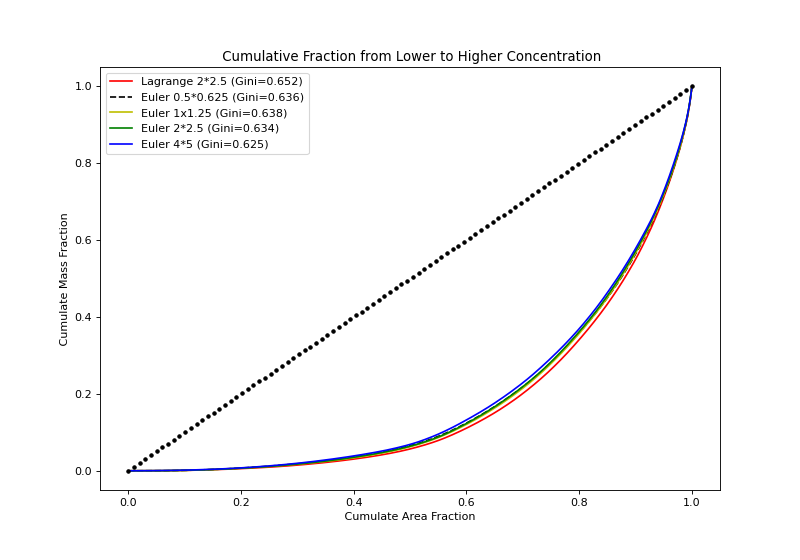

In [31]:
# Plot CFD curve: mass vs. area in the END of the simulation
plt.figure(figsize=(10,7), dpi= 80)

plt.plot(LA0_area_cumsum_frac_time[Nt1-1],LA0_mass_cumsum_frac_time[Nt1-1],'r',label=f'Lagrange 2*2.5 (Gini={Gini_La0:.3f})')

plt.plot(EU1_area_cumsum_frac_time[Nt1-1],EU1_mass_cumsum_frac_time[Nt1-1],'k--',label=f'Euler 0.5*0.625 (Gini={Gini_Eu1:.3f})')
plt.plot(EU2_area_cumsum_frac_time[Nt1-1],EU2_mass_cumsum_frac_time[Nt1-1],'y',label=f'Euler 1x1.25 (Gini={Gini_Eu2:.3f})')
plt.plot(EU3_area_cumsum_frac_time[Nt1-1],EU3_mass_cumsum_frac_time[Nt1-1],'g',label=f'Euler 2*2.5 (Gini={Gini_Eu3:.3f})')
plt.plot(EU4_area_cumsum_frac_time[Nt1-1],EU4_mass_cumsum_frac_time[Nt1-1],'b',label=f'Euler 4*5 (Gini={Gini_Eu4:.3f})')



diag = np.linspace(0,1,100)
plt.plot(diag,diag,'k.')


#plt.legend(loc='upper left')
plt.title(' Cumulative Fraction from Lower to Higher Concentration')
plt.xlabel(' Cumulate Area Fraction ')
plt.ylabel(' Cumulate Mass Fraction ')
plt.legend()

plt.savefig('CDF_Area_Mass.png')
plt.clf();
plt.cla();
plt.close();

Image('CDF_Area_Mass.png') 

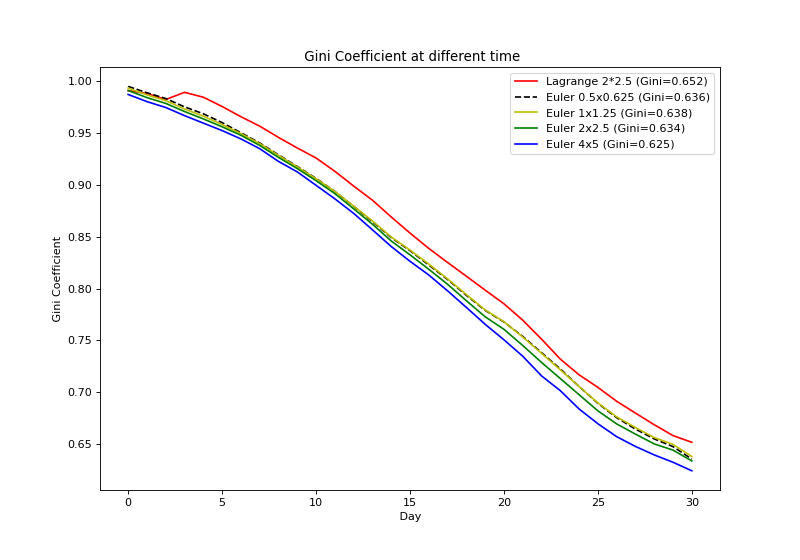

In [25]:
# Plot Gini coefficient at different time:

plt.figure(figsize=(10,7), dpi= 80)

plt.plot(Gini_La0_time,'r',label=f'Lagrange 2*2.5 (Gini={Gini_La0:.3f})')

plt.plot(Gini_Eu1_time,'k--',label=f'Euler 0.5x0.625 (Gini={Gini_Eu1:.3f})')
plt.plot(Gini_Eu2_time,'y',label=f'Euler 1x1.25 (Gini={Gini_Eu2:.3f})')
plt.plot(Gini_Eu3_time,'g',label=f'Euler 2x2.5 (Gini={Gini_Eu3:.3f})')
plt.plot(Gini_Eu4_time,'b',label=f'Euler 4x5 (Gini={Gini_Eu4:.3f})')


#plt.legend(loc='upper left')
plt.title(' Gini Coefficient at different time')
plt.xlabel(' Day ')
plt.ylabel(' Gini Coefficient ')
plt.legend()

plt.savefig('Gini_time_series.png')
plt.clf();
plt.cla();
plt.close();

Image('Gini_time_series.png') 

In [28]:
CPU_La0 = 11*24+12

CPU_Eu1 = 26*24+2
CPU_Eu2 = 6*24+18
CPU_Eu3 = 18
CPU_Eu4 = 5

CPU_Eus = [CPU_Eu1, CPU_Eu2,CPU_Eu3,CPU_Eu4]
Gini_Eus = [Gini_Eu1, Gini_Eu2,Gini_Eu3,Gini_Eu4]

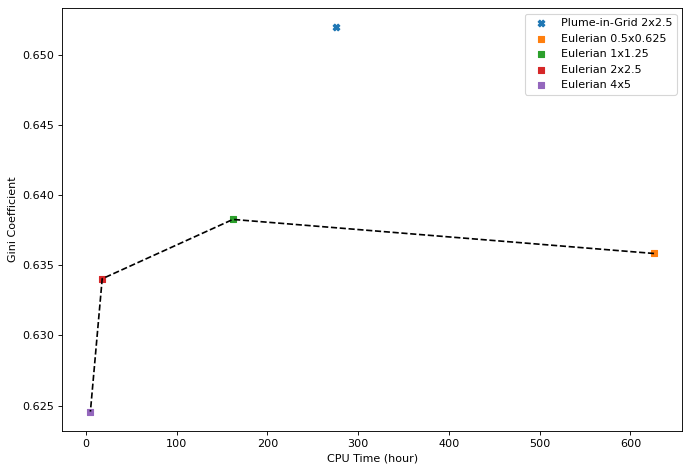

In [32]:

plt.figure(figsize=(10,7), dpi= 80)

plt.plot(CPU_Eus, Gini_Eus, 'k--')

plt.scatter(CPU_La0,Gini_La0,  marker='X', label='Plume-in-Grid 2x2.5')
plt.scatter(CPU_Eu1, Gini_Eu1, marker='s', label='Eulerian 0.5x0.625')
plt.scatter(CPU_Eu2, Gini_Eu2, marker='s', label='Eulerian 1x1.25')
plt.scatter(CPU_Eu3, Gini_Eu3, marker='s', label='Eulerian 2x2.5')
plt.scatter(CPU_Eu4, Gini_Eu4, marker='s', label='Eulerian 4x5')

# plt.plot([CPU_Eu1, CPU_Eu1],[0.6,0.7],'y',label='Eulerian 0.5x0.625')

plt.xlabel('CPU Time (hour)')
plt.ylabel('Gini Coefficient')
plt.legend()